In [1]:
#import library
import numpy as np#linear algebra
import pandas as pd # data processing, CSV file I\O(e.g. pd.read_csv)
import datetime as dt

#For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#For Machine Learning Algorithm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


df= pd.read_csv("D:/DAta science/Sentiment_analysis/OnlineRetail.csv", encoding="unicode_escape")
#encoding= 'ISO-8859-1'

Objective- Transactional data of a wholesale customer on set time period. Categories user based on their transaction.

In [2]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

#### Check and Clean Missing Data

In [4]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
df=df.dropna(subset=['CustomerID'])

In [6]:
df.isnull().sum().sum()

0

#### Check & Clean Duplicates Data

In [7]:
df.duplicated().sum()

5225

In [8]:
df=df.drop_duplicates()

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [11]:
fd=df[(df['Quantity']>=0) & (df['UnitPrice']>=0)]
df.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [12]:
df.shape

(401604, 8)

In [13]:
import datetime
#df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y')
#df['InvoiceDate'] =pd.to_datetime.strptime(df['InvoiceDate'], '%m/%d/%Y')
#df['InvoiceDate']=datetime.strptime(df['InvoiceDate'], '%m/%d/%Y %H:%M:%S')

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].values.astype('datetime64[M]')

# Complete the call to convert the date column
eth['date'] =  pd.to_datetime(eth['date'],
                              format='___')

date_dt2 = datetime.strptime(date_str2, '%m/%d/%y')


## COHORT ANALYSIS

Let's create few labels that we have to create:

- INvoice period : A string representation of the year and month of a single transaction/Invoice.
- Cohort Group : A string representation of the year and month of a customer's first purchase.This label is common across all invoices for a particular a customer.
- Cohort Period/ Cohort Index : A integer representation a customer's stage in it's "lifetime".The number represents the number of months passed since the first purchase.

In [14]:

def get_month(x) : return dt.datetime(x.year,x.month,1)
df['InvoiceMonth'] = df['InvoiceDate'].apply(get_month)
grouping = df.groupby('CustomerID')['InvoiceMonth']
df['CohortMonth'] = grouping.transform('min')
df.tail()





,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,InvoiceMonth,CohortMonth
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-01,2011-12-01,2011-08-01
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-01,2011-12-01,2011-08-01
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-12-01,2011-08-01
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-12-01,2011-08-01
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12-01,2011-12-01,2011-08-01


In [15]:
def get_month_int(dframe,column):
    year=dframe[column].dt.year
    month=dframe[column].dt.month
    day=dframe[column].dt.day
    return year, month, day

invoice_year,invoice_month,_ = get_month_int(df,'InvoiceMonth')
cohort_year,cohort_month,_ = get_month_int(df,'CohortMonth')

year_diff=invoice_year - cohort_year
month_diff = invoice_month - cohort_month

df['CohortIndex']=year_diff*12+month_diff+1

In [16]:
#Count monthly active customers from each cohort
grouping = df.groupby(['CohortMonth','CohortIndex'])
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)

#Return number of unique elements in the object
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='CustomerID')
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02-01,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03-01,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04-01,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05-01,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Retention Rate Table

cohort_size = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_size, axis = 0) #axis = 0 to ensure the divide along the row axis
retention.round(3)*100 #to show the number as percentage



CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,38.2,33.4,38.7,36.0,39.7,38.0,35.4,35.4,39.5,37.3,50.0,27.4
2011-01-01,100.0,24.0,28.3,24.2,32.8,29.9,26.1,25.7,31.1,34.7,36.8,15.0,NaN
2011-02-01,100.0,24.7,19.2,27.9,26.8,24.7,25.5,28.2,25.8,31.3,9.2,NaN,NaN
2011-03-01,100.0,19.1,25.5,21.8,23.2,17.7,26.4,23.9,28.9,8.9,NaN,NaN,NaN
2011-04-01,100.0,22.7,22.1,21.1,20.7,23.7,23.1,26.1,8.4,NaN,NaN,NaN,NaN
2011-05-01,100.0,23.7,17.2,17.2,21.5,24.4,26.5,10.4,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,20.9,18.7,27.2,24.7,33.6,10.2,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,20.9,20.4,23.0,27.2,11.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,25.1,25.1,25.1,13.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


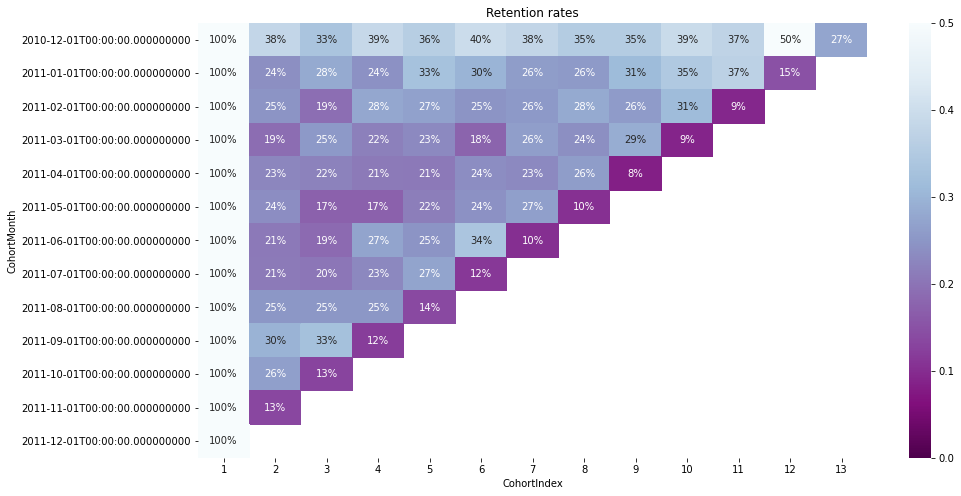

In [18]:
#Build the heatmap
plt.figure(figsize =(15,8))
plt.title('Retention rates')
sns.heatmap(data=retention, annot =True, fmt ='.0%',vmin=0.0,vmax=0.5,cmap="BuPu_r")
plt.show()

Note: Customer retention is a very useful metric to understand how many of the all customers are still active.
    Retention gives you the percentage of active customers compared to the total number of customers

#### # Average quantity for each cohort

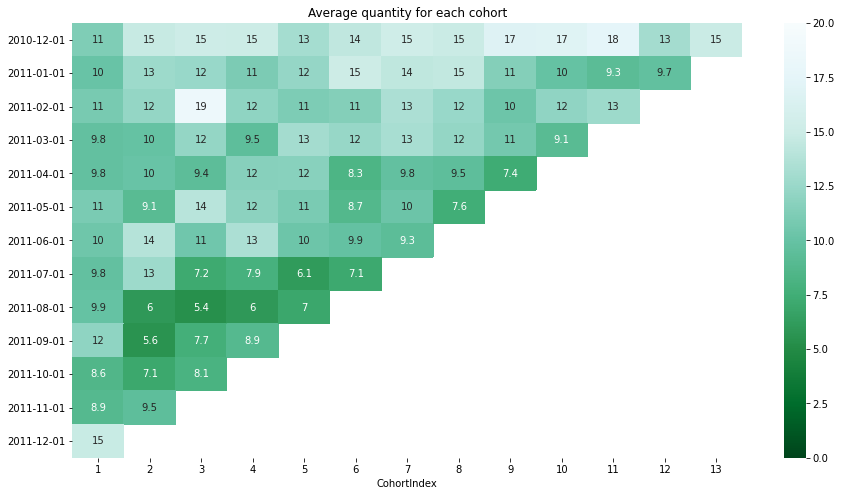

In [19]:
grouping = df.groupby(['CohortMonth','CohortIndex'])
cohort_data = grouping['Quantity'].mean()
cohort_data = cohort_data.reset_index()
average_quantity = cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='Quantity')
average_quantity.round(1)
average_quantity.index = average_quantity.index.date

#Build the heatmap
plt.figure(figsize=(15,8))
plt.title('Average quantity for each cohort')
sns.heatmap(data=average_quantity, annot =True, vmin = 0.0,vmax =20,cmap ="BuGn_r")
plt.show()

Process of Calculating percentiles:
    
    Sort customers based on that metric
    Break customers into pre defined number of groups of equal size
    Assign a label to each group
    `

In [20]:
#New Total Sum Column
df['TotalSum']=df['UnitPrice']* df['Quantity']

#Data preparation steps
print("Min Invoice Date:", df.InvoiceDate.dt.date.min(),'max Invoice Date:',
     df.InvoiceDate.dt.date.max())
df.head(3)

Min Invoice Date: 2010-12-01 max Invoice Date: 2011-12-09


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,InvoiceMonth,CohortMonth,CohortIndex,TotalSum
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,2010-12-01,1,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,2010-12-01,1,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,2010-12-01,1,22.00


In [21]:
# In real world, we would be working with the most recent snapshot of the data of today or yesterday

snapshot_date = df['InvoiceDate'].max()+dt.timedelta(days=1)
snapshot_date
#The last day of purchase in total is 09 Dec, 2011. To calculate the day periods,
#let's set one day after the last one, or
#10 Dec as a snapshot_date. we will count the diff days with snapshot_date.


Timestamp('2011-12-10 12:50:00')

In [22]:
# Calculate RFM metrics
rfm =df.groupby(['CustomerID']).agg({'InvoiceDate':lambda x:(snapshot_date - x.max()).days,
                                    'InvoiceNo':'count','TotalSum':'sum'})
#Function lambda: it gives the number of days b/w hypothetical today and the last transaction

#Rename Columns
rfm.rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency','TotalSum':'MonetaryValue'}
                    ,inplace = True)

#Final RFM values
rfm.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


Note:
    We will rate 'Recency' customer who have been active more recently better than the less recent customer,
    because each company wants its customer to be recent.
    
    Rate "Frequency" and "Monetary Value" higher label because we want customer to spend more money
    and visit more often(that is different order than recency)

In [23]:


#Building RFM segments
r_labels =range(4,0,-1)
f_labels=range(1,5)
m_labels=range(1,5)
r_quartiles = pd.qcut(rfm['Recency'], q=4, labels = r_labels,duplicates='drop')
f_quartiles = pd.qcut(rfm['Frequency'],q=4, labels = f_labels,duplicates='drop')
m_quartiles = pd.qcut(rfm['MonetaryValue'],q=4,labels = m_labels,duplicates='drop')
rfm = rfm.assign(R=r_quartiles,F=f_quartiles,M=m_quartiles)



# Build RFM Segment and RFM Score
def add_rfm(x) : return str(x['R']) + str(x['F']) + str(x['M'])
rfm['RFM_Segment'] = rfm.apply(add_rfm,axis=1 )
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)

rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346.0,326,2,0.00,1,1,1,1.01.01.0,3
12347.0,2,182,4310.00,4,4,4,4.04.04.0,12
12348.0,75,31,1797.24,2,2,4,2.02.04.0,8
12349.0,19,73,1757.55,3,3,4,3.03.04.0,10
12350.0,310,17,334.40,1,1,2,1.01.02.0,4


#### The Result is a table which has a row for each customer with their RFM



#### Analyzing RFM Segments
Largest RFm Segments It is always the best practice to investigate the size of the segments before you use them for targeting
or other business application.

In [24]:
rfm.groupby('RFM_Segment').size().sort_values(ascending=False)[:5]

#datamart.groupby('RFM_Segment').size().sort_values(ascending=False)[:10]

RFM_Segment
4.04.04.0    470
1.01.01.0    393
3.04.04.0    210
1.02.02.0    204
2.01.01.0    181
dtype: int64

In [25]:
#Filtering on RFM Segments

#Select botton RFm Segment "111" and view top 5 rows
rfm[rfm['RFM_Segment']=='111'].head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,


#### SummaryMetrics per RFM Score

In [26]:
rfm.groupby('RFM_Score').agg({'Recency':'mean','Frequency':'mean',
                              'MonetaryValue':['mean','count']}).round(1)


Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Score                                      
3           264.8       7.8         109.2   393
4           174.9      13.8         226.6   390
5           152.5      20.9         342.7   515
6            94.6      28.1         490.8   469
7            79.5      39.2         722.7   439
8            62.8      56.1         965.5   467
9            44.4      77.4        1341.6   413
10           31.5     112.6        1819.2   442
11           20.5     190.4        3892.1   374
12            6.7     367.7        8848.1   470

#### Use RFM score to group customers into Gold, Silver and Bronze Segments:

In [27]:
def segments(df):
    if df['RFM_Score']>9:
        return 'Gold'
    elif (df['RFM_Score']>5) and (df['RFM_Score']<=9):
        return 'Silver'
    else:
        return 'Bronze'
    
rfm['General_Segment']=rfm.apply(segments,axis=1)
rfm.groupby('General_Segment').agg({"Recency":'mean','Frequency':'mean',
                                   'MonetaryValue':['mean','count']}).round(1)

Recency Frequency MonetaryValue      
                   mean      mean          mean count
General_Segment                                      
Bronze            193.2      14.8         237.1  1298
Gold               19.2     228.5        4990.9  1286
Silver             71.0      49.5         868.2  1788

### Data Preprocesing for Kmeans Clustering

Look for k means assumptions before implementingKmeans Clusterig Mode

- Symmetric distribution of variables(not skewed)
- Variables with same avearage values
- Variables with same variance

In [28]:
rfm_rfm = rfm[['Recency','Frequency','MonetaryValue']]
print(rfm_rfm.describe())

           Recency    Frequency  MonetaryValue
count  4372.000000  4372.000000    4372.000000
mean     92.047118    91.858188    1893.531433
std     100.765435   229.223566    8218.696204
min       1.000000     1.000000   -4287.630000
25%      17.000000    17.000000     291.795000
50%      50.000000    41.000000     644.070000
75%     143.000000    99.250000    1608.335000
max     374.000000  7812.000000  279489.020000


From this table , we find mean and Variance are not equal
- Solution : Scaling variables by using a scaler from Scikit-learn library

D:\July 2019\pYTHON\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\July 2019\pYTHON\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\July 2019\pYTHON\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for

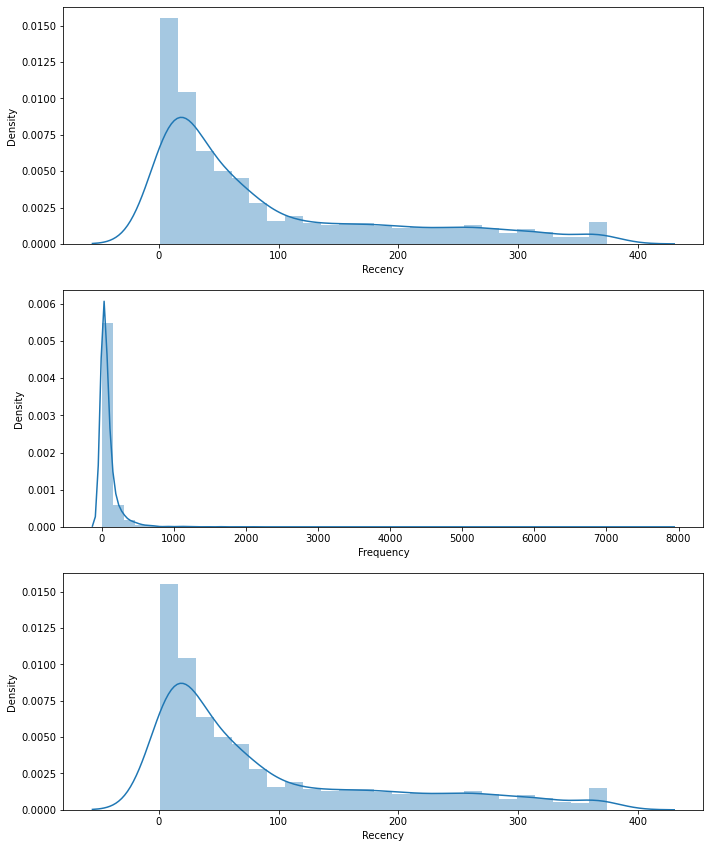

In [29]:
#Plot the distribution of RFM values
f,ax = plt.subplots(figsize=(10,12))
plt.subplot(3,1,1);sns.distplot(rfm.Recency, label ='Recency')
plt.subplot(3,1,2);sns.distplot(rfm.Frequency, label ='Frequency')
plt.subplot(3,1,3);sns.distplot(rfm.Recency, label ='Recency')
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.show()

In [30]:
#Define function for the values below 0

def neg_to_zero(x):
    if x<=0:
        return 1
    else:
        return x
    
#Apply the function to Recency and MonetaryValue Column
rfm['Regency']=[neg_to_zero(x) for x in rfm.Recency]
rfm['MonetaryValue']=[neg_to_zero(x) for x in rfm.MonetaryValue]

D:\July 2019\pYTHON\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\July 2019\pYTHON\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\July 2019\pYTHON\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for

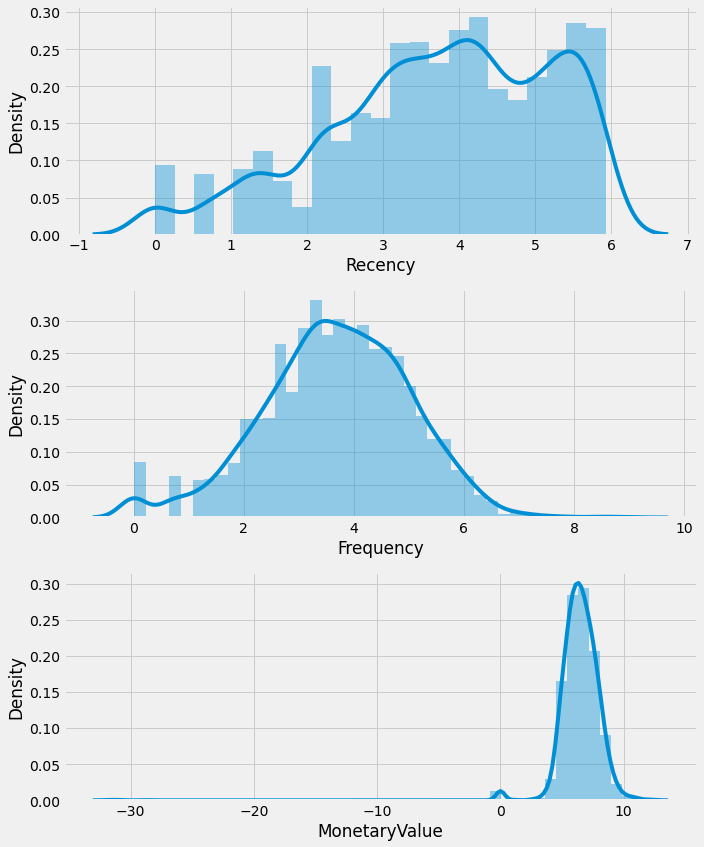

In [31]:
#Unskew the data with log transformation
rfm_log = rfm[['Recency','Frequency','MonetaryValue']].apply(np.log, axis=1).round(3)

#rfm_log =np.log(rfm_rfm)

#plot the distribution of RFM Values
f,ax = plt.subplots(figsize=(10,12))
plt.subplot(3,1,1); sns.distplot(rfm_log.Recency,label='Recency')
plt.subplot(3,1,2); sns.distplot(rfm_log.Frequency,label='Frequency')
plt.subplot(3,1,3); sns.distplot(rfm_log.MonetaryValue,label='MonetaryValue')
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.show()



## Implementation of K-means Clustering

#### 1. Data Pre-Processing

In [32]:
#Normalize the variables with StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(rfm_log)

 #Store it seperately for clustering
rfm_normalized = scaler.transform(rfm_log)

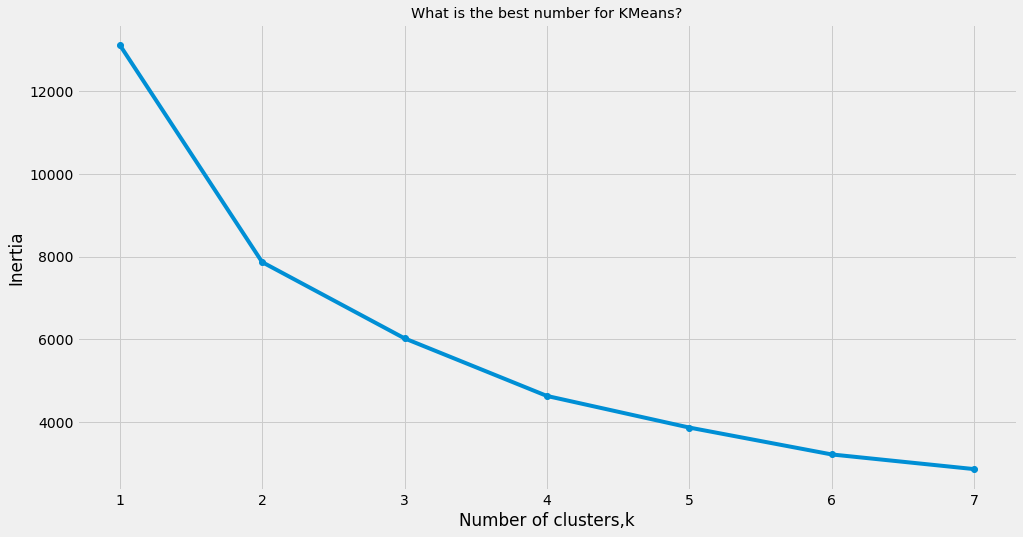

In [33]:
from sklearn.cluster import KMeans
ks=range(1,8)
inertias=[]
for k in ks:
    #Create a Kmeans Clusters
    kc=KMeans(n_clusters=k,random_state=1)
    kc.fit(rfm_normalized)
    inertias.append(kc.inertia_)
    
#plot kd Vs Inertias
f,ax=plt.subplots(figsize=(15,8))
plt.plot(ks,inertias,'-o')
plt.xlabel('Number of clusters,k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.style.use('ggplot')
plt.title('What is the best number for KMeans?')
plt.show()

Note: We Choose No.KMeans = 3

In [34]:
#Clustering
kc=KMeans(n_clusters=3, random_state=1)
kc.fit(rfm_normalized)

#Create a cluster label column in the original dataframe
cluster_labels=kc.labels_

#Calculate average RFM values and size for each cluster:
rfm_rfm_k3=rfm_rfm.assign(K_Cluster=cluster_labels)

#Calculate average RFM values and sizes for each cluster:
rfm_rfm_k3.groupby('K_Cluster').agg({'Recency':'mean','Frequency':'mean','MonetaryValue':['mean','count']}).round(0)

Recency Frequency MonetaryValue      
             mean      mean          mean count
K_Cluster                                      
0           147.0      25.0         464.0  2374
1            26.0     172.0        3601.0  1993
2            70.0      56.0           0.0     5

In [35]:
rfm_normalized =pd.DataFrame(rfm_normalized, index=rfm_rfm.index, columns=rfm_rfm.columns)
rfm_normalized['K_Cluster']=kc.labels_
rfm_normalized['General_Segment']=rfm['General_Segment']
rfm_normalized.reset_index(inplace=True)

#Melt the data into a long format so RFM values and metrics names are stored in 1 column each
rfm_melt=pd.melt(rfm_normalized, id_vars=['CustomerID','General_Segment','K_Cluster'],value_vars=['Recency','Frequency','MonetaryValue'],
               var_name='Metric',value_name='Value' )
rfm_melt.head()


,CustomerID,General_Segment,K_Cluster,Metric,Value
0,12346.0,Bronze,0,Recency,1.403003
1,12347.0,Gold,1,Recency,-2.075211
2,12348.0,Silver,0,Recency,0.399278
3,12349.0,Gold,1,Recency,-0.538215
4,12350.0,Bronze,0,Recency,1.368863


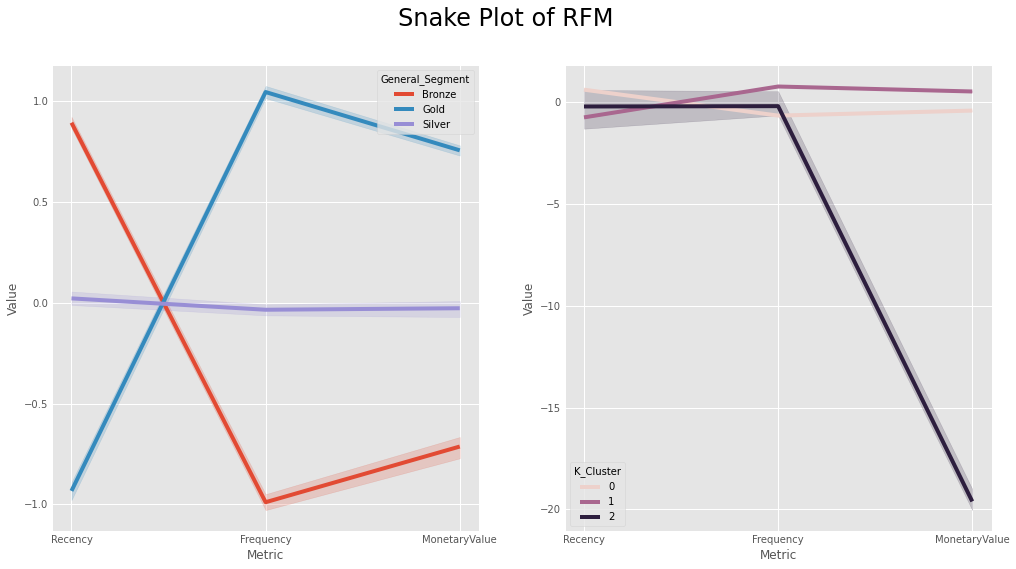

In [36]:
#Snake Plot and Heatmap

f, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 8))
sns.lineplot(x = 'Metric', y = 'Value', hue = 'General_Segment', data = rfm_melt,ax=ax1)

# a snake plot with K-Means
sns.lineplot(x = 'Metric', y = 'Value', hue = 'K_Cluster', data = rfm_melt,ax=ax2)

plt.suptitle("Snake Plot of RFM",fontsize=24) #make title fontsize subtitle 
plt.show()

In [37]:
#The further a ratio is from 0, the more important that attribute is for a segment relative to the total population
cluster_avg = rfm_rfm_k3.groupby(['K_Cluster']).mean()
population_avg=rfm_rfm.mean()
relative_imp = cluster_avg/population_avg-1
relative_imp.round(2)

,Recency,Frequency,MonetaryValue
K_Cluster,,,
0,0.60,-0.73,-0.75
1,-0.71,0.87,0.90
2,-0.24,-0.39,-1.00


In [38]:
#the mean value in total
total_avg = rfm.iloc[:,0:3].mean()

#Calculate the proportional gap with total mean
cluster_avg = rfm.groupby('General_Segment').mean().iloc[:,0:3]
prop_rfm = cluster_avg/total_avg-1
prop_rfm.round(2)


,Recency,Frequency,MonetaryValue
General_Segment,,,
Bronze,1.10,-0.84,-0.87
Gold,-0.79,1.49,1.63
Silver,-0.23,-0.46,-0.54


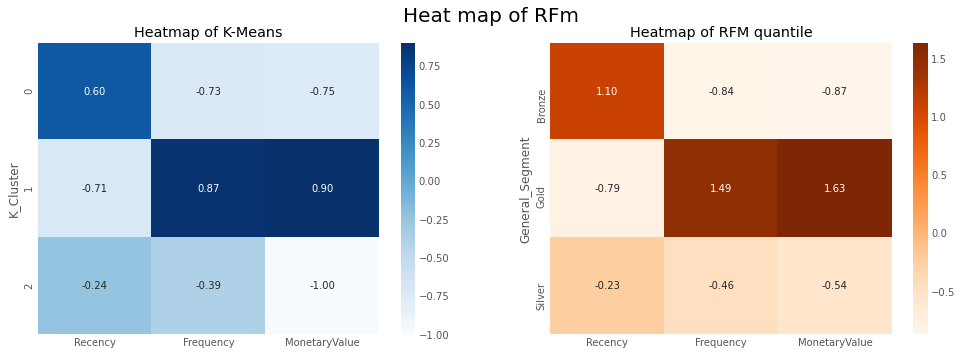

In [39]:
#heatmap with RFM

f,(ax1,ax2)=plt.subplots(1,2,figsize =(15,5))
sns.heatmap(data=relative_imp,annot=True, fmt='.2f', cmap='Blues',ax=ax1)
ax1.set(title='Heatmap of K-Means')

#a Snake plot with K-means
sns.heatmap(prop_rfm,cmap='Oranges',fmt='.2f',annot=True, ax=ax2)
ax2.set(title='Heatmap of RFM quantile')

plt.suptitle('Heat map of RFm', fontsize=20)#make title fontsize subtitle

plt.show()

Updated RFM data by adding Tenure variable: -Tenure: time since the first transaction. Defines how long the customer has been with the company.

##### Conclusion: We talked about how to get RFM values from customer purchase data, and we made two kinds of segmentation with RFm quantiles and K-Means clustering methods